In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy.interpolate as spi

In [2]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 6) for tnn in true_nlist]

s = 1.0
sclist = [0.1, 0.5, 1.0]
L = 1.0
res_dir = 'nsc-ratio'
n_perms = 1

In [3]:
plot_data = {}
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        for randix in range(0, n_perms):
            fout = (
                f"{res_dir}/D={D}_n={float(n):.5f}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
            )
            res = pd.read_csv(fout+'_civs.csv')
            res_years = pd.read_csv(fout+'_years.csv')
            print(res.shape[0])
            #plt.figure()
            #plt.plot(res.RatioNonGrabby);
            #plt.gca().set_yscale('log');
            plot_data[(true_n, sc)] = (res.RatioNonGrabby, res.RatioNonGrabbyNow)

5831
1707
1709
4623
22264
5831
1707
1709
4623
22264
5831
1707
1709
4623
22264


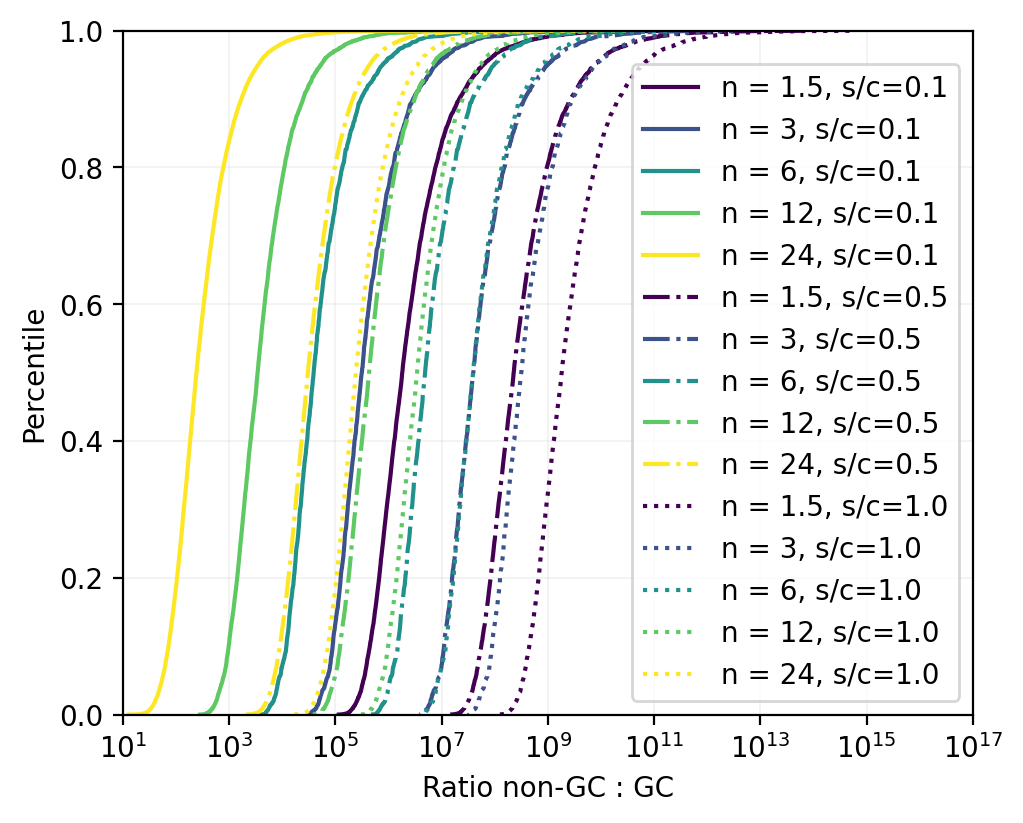

In [4]:
plt.rcParams['figure.constrained_layout.use'] = True
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
fig = plt.figure(figsize=(5,4),dpi=200)
ax  = fig.add_subplot(111)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        ratioNonGC = plot_data[(true_n, sc)][1]
        C = ratioNonGC.shape[0]
        pctiles = 1-(np.arange(1, C+1)/float(C))
        plt.plot(ratioNonGC, pctiles, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c={sc:.1f}")
plt.xlabel('Ratio non-GC : GC');
plt.ylabel('Percentile');
plt.gca().set_xscale('log')
plt.gca().set_ylim(0, 1.0);
plt.gca().set_xlim(1e1, 1e17);
plt.grid(linewidth=0.1);
plt.legend(leg, loc='lower right');
fig.savefig(f'figures-friday/plotRatioNonGC-all.png', dpi=200);

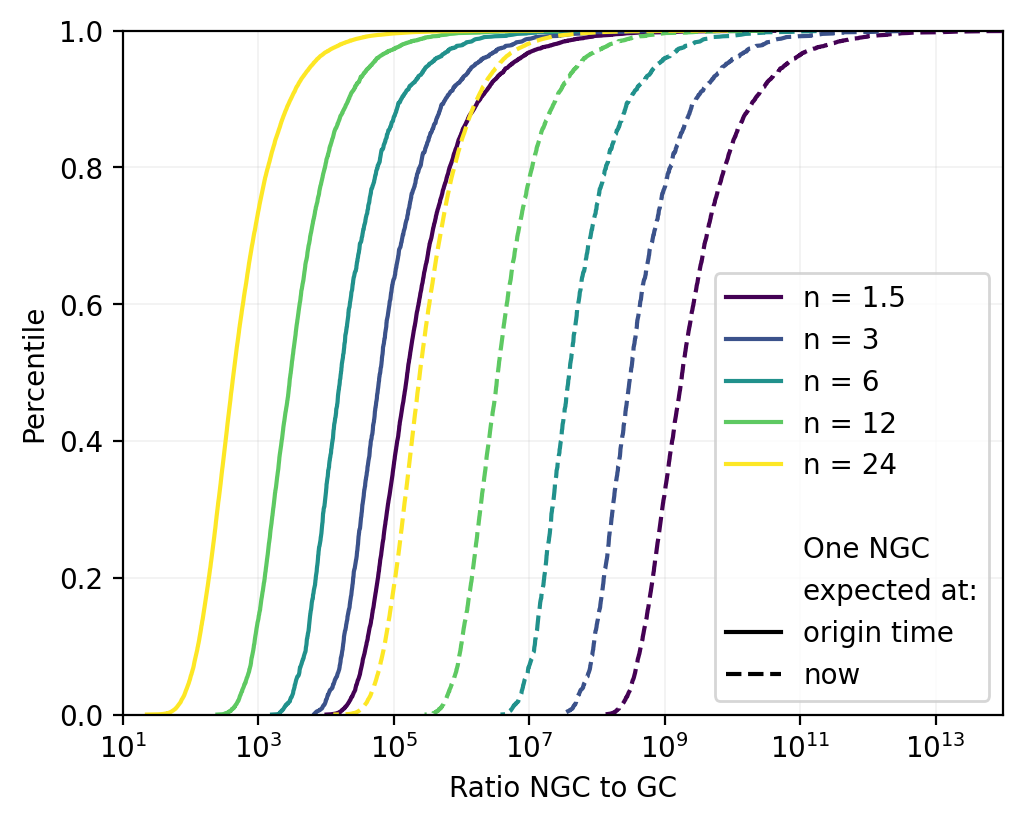

In [5]:
plt.rcParams['figure.constrained_layout.use'] = True
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
fig = plt.figure(figsize=(5,4),dpi=200)
ax  = fig.add_subplot(111)
leg = []
sc = 1.0

for nix, true_n in enumerate(true_nlist):
    ratioNonGC = plot_data[(true_n, sc)][0]
    ratioNonGCNow = plot_data[(true_n, sc)][1]
    C = ratioNonGC.shape[0]
    pctiles = 1-(np.arange(1, C+1)/float(C))
    plt.plot(ratioNonGC, pctiles, '-', color=mycols[nix])
    leg.append(f"n = {true_n}")

plt.plot(np.NaN, np.NaN, '-', color='none', label='');
leg.append("");
plt.plot(np.NaN, np.NaN, '-', color='none', label='');
leg.append("One NGC");
plt.plot(np.NaN, np.NaN, '-', color='none', label='');
leg.append("expected at:");
plt.plot([0], [0], '-', color='black');
leg.append(f"origin time");
plt.plot([0], [0], '--', color='black');
leg.append(f"now");
for nix, true_n in enumerate(true_nlist):
    ratioNonGC = plot_data[(true_n, sc)][0]
    ratioNonGCNow = plot_data[(true_n, sc)][1]
    C = ratioNonGC.shape[0]
    pctiles = 1-(np.arange(1, C+1)/float(C))
    plt.plot(ratioNonGCNow, pctiles, '--', color=mycols[nix])
    #leg.append(f"n = {true_n} (now)")
plt.xlabel('Ratio NGC to GC');
plt.ylabel('Percentile');
plt.gca().set_xscale('log')
plt.gca().set_ylim(0, 1.0);
plt.gca().set_xlim(1e1, 1e14);
plt.grid(linewidth=0.1);
plt.legend(leg, loc='lower right');
fig.savefig(f'figures-friday/plotRatioNonGC-n.png', dpi=200);

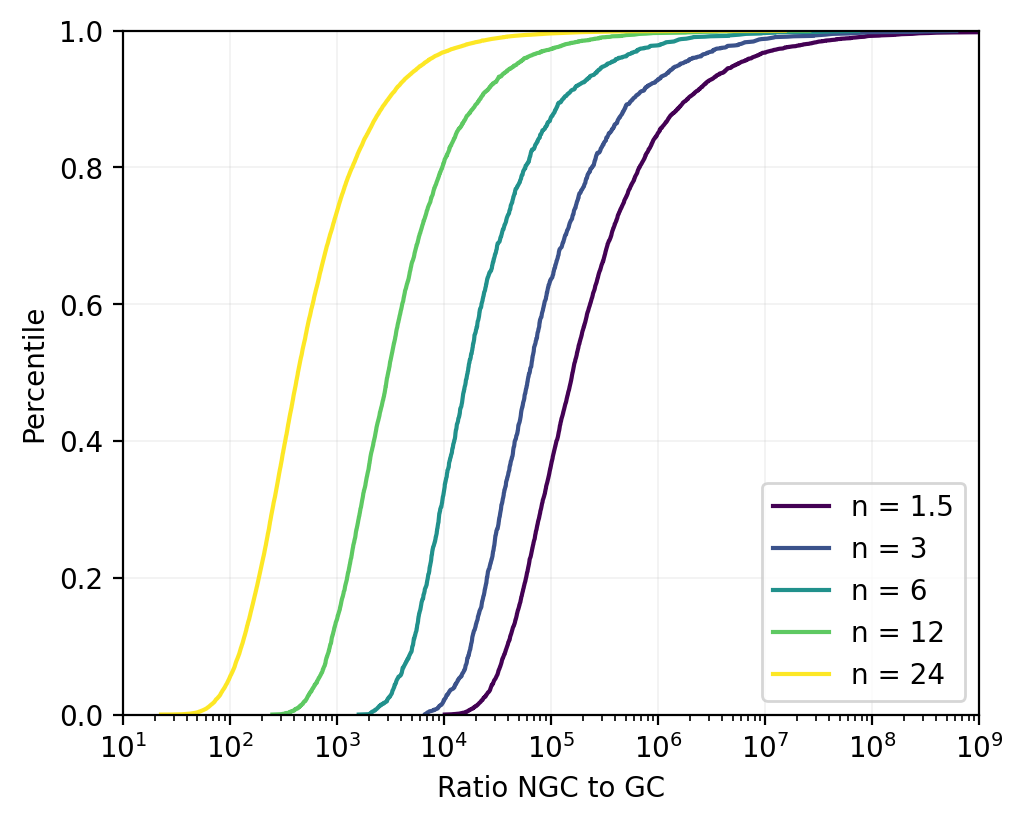

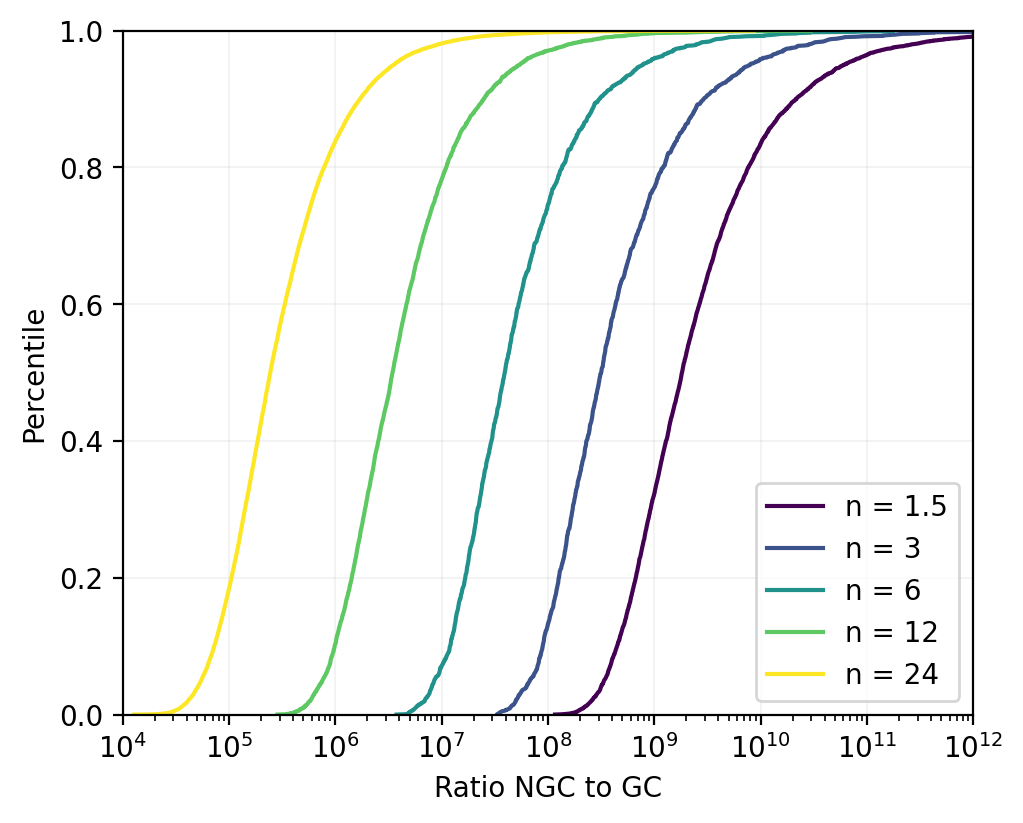

In [11]:
sc = 1.0
plt.rcParams['figure.constrained_layout.use'] = True
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
fig = plt.figure(figsize=(5,4),dpi=200)
ax  = fig.add_subplot(111)
leg = []


for nix, true_n in enumerate(true_nlist):
    ratioNonGC = plot_data[(true_n, sc)][0]
    ratioNonGCNow = plot_data[(true_n, sc)][1]
    C = ratioNonGC.shape[0]
    pctiles = 1-(np.arange(1, C+1)/float(C))
    plt.plot(ratioNonGC, pctiles, '-', color=mycols[nix])
    leg.append(f"n = {true_n}")
plt.xlabel('Ratio NGC to GC');
plt.ylabel('Percentile');
plt.gca().set_xscale('log')
plt.gca().set_ylim(0, 1.0);
plt.gca().set_xlim(1e1, 1e9);
plt.grid(linewidth=0.1);
plt.legend(leg, loc='lower right');
fig.savefig(f'figures-friday/plotRatioNonGC-origin.png', dpi=200);

fig = plt.figure(figsize=(5,4),dpi=200)
ax  = fig.add_subplot(111)
leg = []
for nix, true_n in enumerate(true_nlist):
    ratioNonGC = plot_data[(true_n, sc)][0]
    ratioNonGCNow = plot_data[(true_n, sc)][1]
    C = ratioNonGC.shape[0]
    pctiles = 1-(np.arange(1, C+1)/float(C))
    plt.plot(ratioNonGCNow, pctiles, '-', color=mycols[nix])
    leg.append(f"n = {true_n}")
plt.xlabel('Ratio NGC to GC');
plt.ylabel('Percentile');
plt.gca().set_xscale('log')
plt.gca().set_ylim(0, 1.0);
plt.gca().set_xlim(1e4, 1e12);
plt.grid(linewidth=0.1);
plt.legend(leg, loc='lower right');
fig.savefig(f'figures-friday/plotRatioNonGC-now.png', dpi=200);